In [11]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv"
df = pd.read_csv(url, sep=';')

##De 5 ulike featuresene vi velger er, Passasjerer_Ombord, Kjøretøy_Kapasitet, Linjetype, Linjefylke og Område
df.isna().sum()
dfut=df.drop(["TurId","Dato","Fylke","Linjetype","Holdeplass_Fra","Holdeplass_Til","Linjeretning","Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra","Tidspunkt_Faktisk_Avgang_Holdeplass_Fra","Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra","Tidspunkt_Planlagt_Avgang_Holdeplass_Fra"], axis=1)
dfut.head(n=1000)


,Område,Kommune,Linjefylke,Linjenavn,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,Vest,Bærum,Viken,150,112,5
1,Vest,Bærum,Viken,150,112,5
2,Vest,Bærum,Viken,150,112,6
3,Vest,Bærum,Viken,150,112,10
4,Vest,Bærum,Viken,150,112,10
...,...,...,...,...,...,...
995,Indre By,Gamle Oslo,Oslo,60,33,19
996,Nordøst,Lillestrøm,Viken,480,106,13
997,Nordøst,Lørenskog,Viken,310,72,3
998,Indre By,Frogner,Viken,150E,112,2


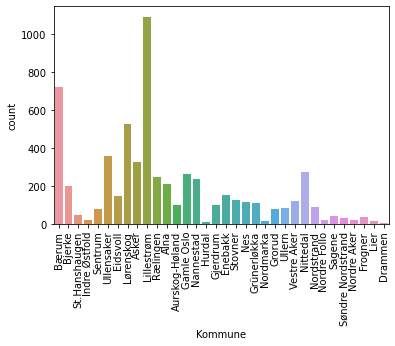

In [8]:
#Mest populære kommune
df['antallKommune'] = df["Kommune"].value_counts()
sns.countplot(x='Kommune' , data=df)
plt.xticks(rotation=90);

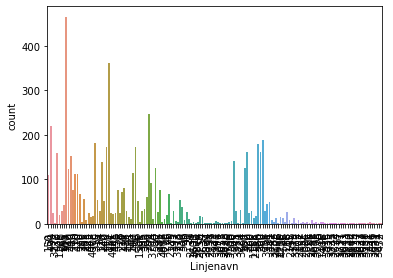

In [10]:
#Mest populære linje
df['antallLinje']=df["Linjenavn"].value_counts()
sns.countplot(x='Linjenavn', data=df);
plt.xticks(rotation=90);

In [21]:
#Linje med mest passasjerer
for i in df['Linjenavn']:
    antallpassasjerer=df["Passasjerer_Ombord"].value_counts()
    
    
fig, ax = plt.subplots()
ax.bar(antallpassasjerer)
ax.set_title('Linje med flest passasjerer')
ax.set_xlabel('Linjenavn')
ax.set_ylabel('antallpassasjerer')


KeyError: '150'

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Thursday'),
  Text(1, 0, 'Saturday'),
  Text(2, 0, 'Sunday'),
  Text(3, 0, 'Monday'),
  Text(4, 0, 'Wednesday'),
  Text(5, 0, 'Tuesday'),
  Text(6, 0, 'Friday')])

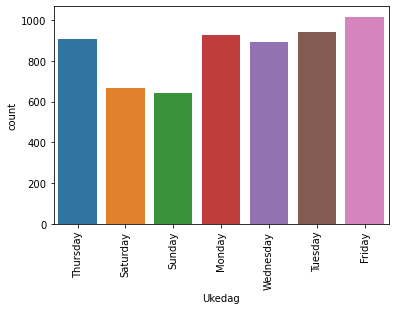

In [22]:
# Convert the date into format which the computer can understand
df['Dato'] = pd.to_datetime(df['Dato'])

# Create a new column 'Ukedag' which is the day of the week the trip took place
df['Ukedag'] = df['Dato'].dt.day_name()

# Create a graph of the new column 'Ukedag'
sns.countplot(x='Ukedag', data=df)
plt.xticks(rotation=90)


0       0.04
1       0.04
2       0.05
3       0.09
4       0.09
        ... 
5995    0.01
5996    0.01
5997    0.03
5998    0.03
5999   -0.05
Name: Passasjer_fyll_prosent, Length: 6000, dtype: float64


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0-20%'),
  Text(1, 0, '20-40%'),
  Text(2, 0, '40-60%'),
  Text(3, 0, '60-80%'),
  Text(4, 0, '80-100%,')])

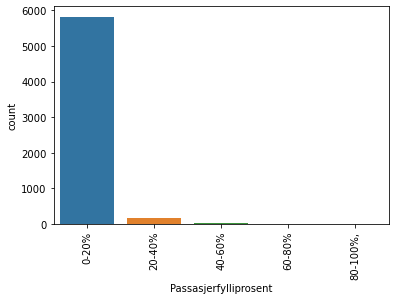

In [32]:
df['Passasjer_fyll_prosent'] = round((df.Passasjerer_Ombord/df.Kjøretøy_Kapasitet), 2)
print(df['Passasjer_fyll_prosent'])

conditions = [
    (df['Passasjer_fyll_prosent'] < 0.2),
    (df['Passasjer_fyll_prosent'] >= 0.2) &  (df['Passasjer_fyll_prosent'] < 0.4),
    (df['Passasjer_fyll_prosent'] >= 0.4) &  (df['Passasjer_fyll_prosent'] < 0.6),
    (df['Passasjer_fyll_prosent'] >= 0.6) &  (df['Passasjer_fyll_prosent'] < 0.8),
    (df['Passasjer_fyll_prosent'] >= 0.8) &  (df['Passasjer_fyll_prosent'] <= 1)
]

prosenter = [
    '0-20%',
    '20-40%',
    '40-60%',
    '60-80%',
    '80-100%,'
]

df['Passasjerfylliprosent']=np.select(conditions,prosenter)
sns.countplot(x='Passasjerfylliprosent', data=df, order=prosenter)
plt.xticks(rotation=90)